# Bike Sharing Demand

## Attribute Information:

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

- **instant**: record index
- **dteday** : date
- **season** : season (1:winter, 2:spring, 3:summer, 4:fall)
- **yr** : year (0: 2011, 1:2012)
- **mnth** : month ( 1 to 12)
- **hr** : hour (0 to 23)
- **holiday** : weather day is holiday or not (extracted from [Web Link])
- **weekday** : day of the week
- **workingday** : if day is neither weekend nor holiday is 1, otherwise is 0.
- **weathersit** :
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- **temp** : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- **atemp**: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- **hum**: Normalized humidity. The values are divided to 100 (max)
- **windspeed**: Normalized wind speed. The values are divided to 67 (max)
- **casual**: count of casual users
- **registered**: count of registered users
- **cnt**: count of total rental bikes including both casual and registered

In [2]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

import seaborn as sns

In [9]:
# Reading the CSv file
df = pd.read_csv('hour.csv', parse_dates=True)

# Dropping instant as it the same as index column
df = df.drop('instant', axis=1)

# Showing the first five rows
df.head()


,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 2.1+ MB


In [11]:
# Changing the type of column dteday from object to Datetime

df['dteday'] = pd.to_datetime(df['dteday'])

# 1) EDA

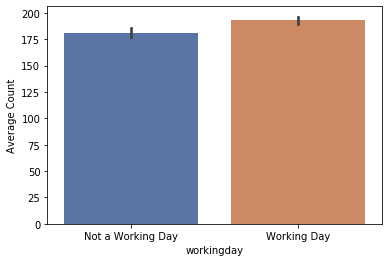

In [88]:
ax = sns.barplot(x = 'workingday', y = 'cnt', data = df, estimator = np.average,
            palette='deep')
ax.set_xticklabels(['Not a Working Day', 'Working Day'])
plt.ylabel('Average Count');

**Slightly More people on average use bikes on Working Days**

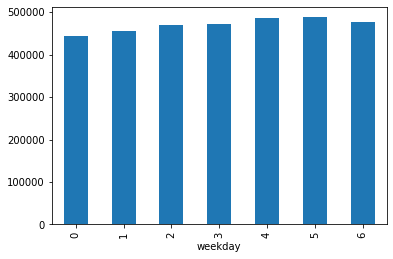

In [161]:
plt.figure(figsize=(6, 4))
ax = df.groupby('weekday')['cnt'].sum().plot(kind='bar')

**The use of bikes is same on all the days**

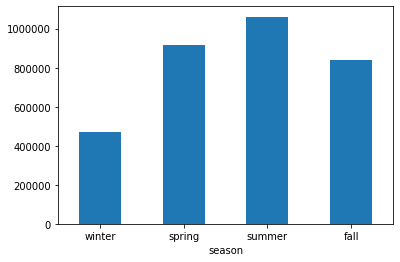

In [115]:
plt.figure(figsize=(6, 4))
ax = df.groupby('season')['cnt'].sum().plot(kind='bar')
ax.set_xticklabels(['winter', 'spring', 'summer', 'fall'], rotation=0);

**Lot more people use Bikes in the month of Summer**

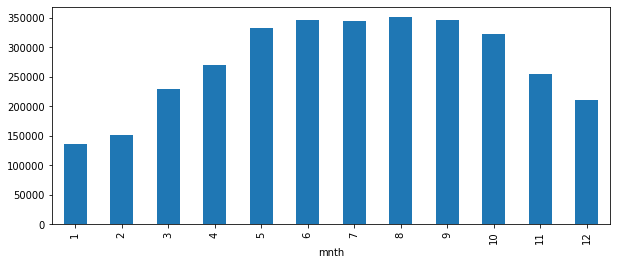

In [120]:
plt.figure(figsize=(10, 4))
ax = df.groupby('mnth')['cnt'].sum().plot(kind='bar')

**The use of Bikes peak around the months from August - Spetember**

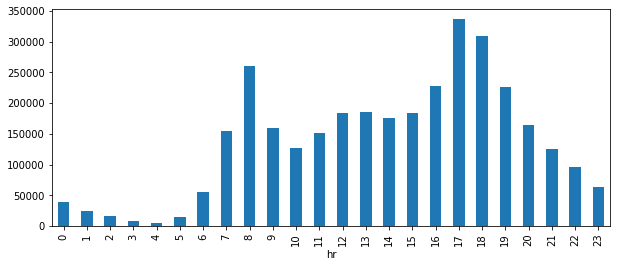

In [121]:
plt.figure(figsize=(10, 4))
ax = df.groupby('hr')['cnt'].sum().plot(kind='bar')

- **The use of Rental bikes is very low during the early hours between 0-5**
- **The use of bikes increases during hours 7 - 9, this may be due to people going to work**
- **Alot more people use bikes during the hours of 17-19, this may be due to people returning from work**
- **Also more people use bikes for returning from work, this may be due to people are tired after a hard day of work**


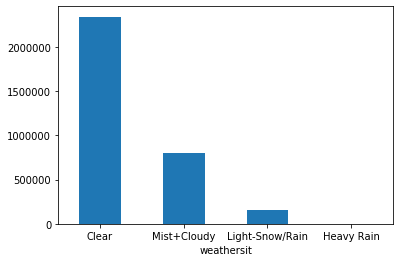

In [133]:
ax = df.groupby('weathersit')['cnt'].sum().plot(kind='bar')
ax.set_xticklabels(['Clear', 'Mist+Cloudy', 'Light-Snow/Rain', 'Heavy Rain'], rotation=0);

**People use bikes mostly when the weather is Clear**

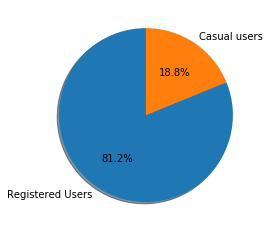

In [157]:
labels = 'Registered Users', 'Casual users'

registered_users = round(df['registered'].sum()/df['cnt'].sum()*100, 2)
casual_users = round(df['casual'].sum()/df['cnt'].sum()*100, 2)

sizes = [registered_users, casual_users]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90);

**Of all the bikes used, 83% are used by Registered Users**

In [160]:
df.groupby('weekday').sum()

,season,yr,mnth,hr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
weekday,,,,,,,,,,,,,,
0,6231,1271,16231,28911,0,0,3408,1210.52,1164.6976,1571.24,470.6084,140521,303506,444027
1,6169,1244,16062,28649,357,2122,3548,1227.22,1179.7755,1575.78,468.1913,70784,384719,455503
2,6204,1231,15986,28509,23,2430,3621,1247.52,1195.0513,1569.51,470.7732,57843,411266,469109
3,6214,1246,16196,28530,24,2451,3677,1254.02,1196.7316,1595.93,463.2512,57319,415729,473048
4,6231,1246,16284,28555,48,2423,3465,1252.84,1198.4877,1506.39,474.4004,61460,423935,485395
5,6207,1248,16399,28670,48,2439,3512,1234.62,1173.4364,1526.62,463.6522,78238,409552,487790
6,6220,1248,16462,28847,0,0,3539,1210.40,1160.3154,1555.14,492.8296,153852,323955,477807


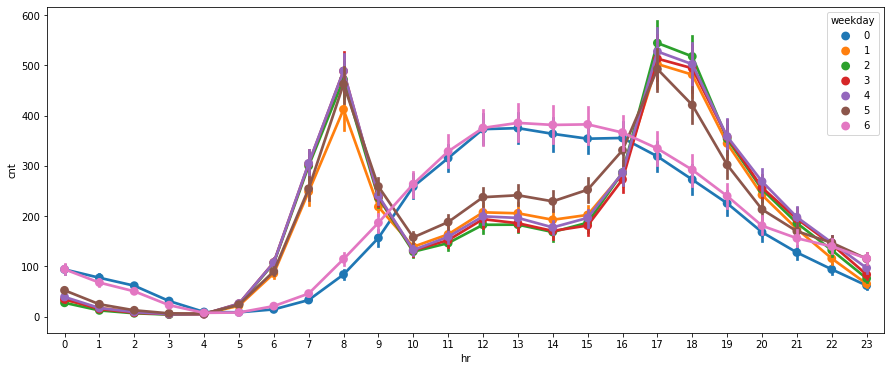

In [170]:
plt.figure(figsize=(15, 6))
sns.pointplot(x='hr', y='cnt', data=df, hue='weekday');

- **On weekends (Saturday/Sunday), there is an increase in the use of bikes between the hours (10-16) i.e afternoon and no peaks during the hours (7-9) and (5-7)**
- **During weekdays we can obseve an peak during the hours (7-9) and (5-7)**
- **During weekdays we can obseve an decrease of bike use during afternoon hours**

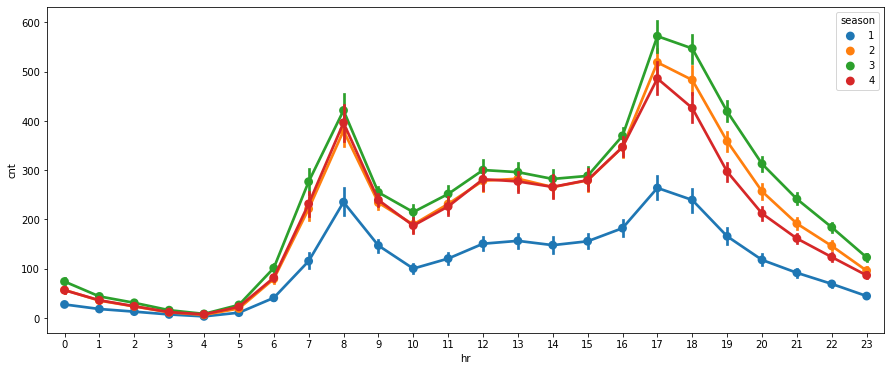

In [171]:
plt.figure(figsize=(15, 6))
sns.pointplot(x='hr', y='cnt', data=df, hue='season');

**We can see similar trends across all seasons for for bike use**

In [ ]:
plt.figure(figsize=(15, 6))
sns.pointplot(x='hr', y='cnt', data=df, hue='season');

In [172]:
df.columns

Index(['dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

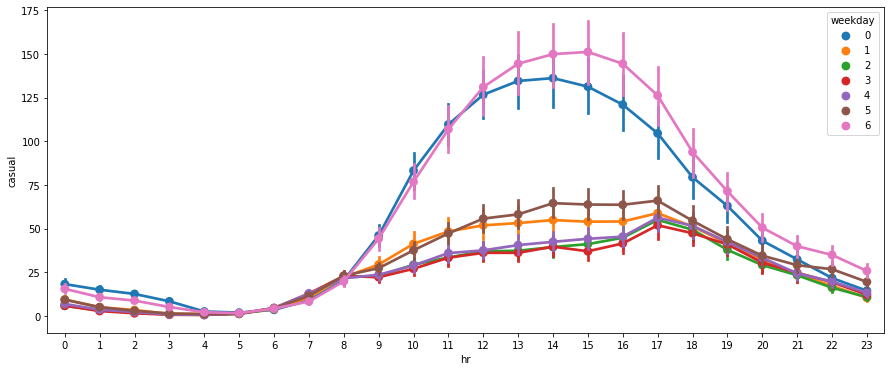

In [181]:
plt.figure(figsize=(15, 6))
sns.pointplot(x='hr', y='casual', data=df, hue='weekday');

- **We can see that there are no peaks for casual users during the work hours**
- **There is a substantial increase in the demand for bikes during the weekends for casual users during the afternoon hours, we do not observe such trend for registered users**

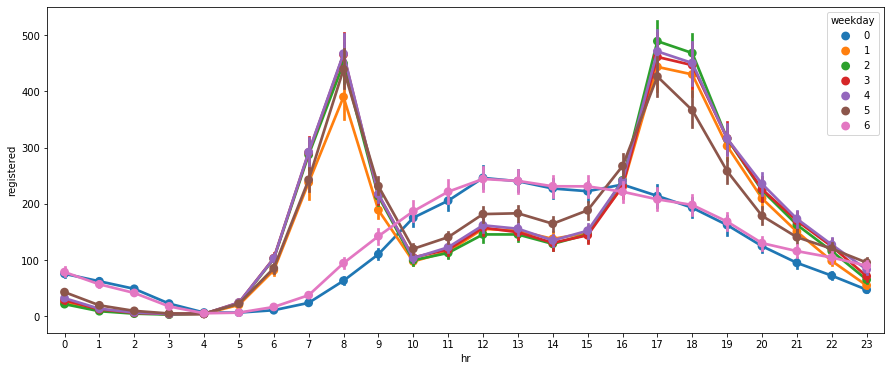

In [182]:
plt.figure(figsize=(15, 6))
sns.pointplot(x='hr', y='registered', data=df, hue='weekday');

- **We can observe a peek during the working hours for registered users,so we can conclude that most registered users use bikes to commute from work to home**

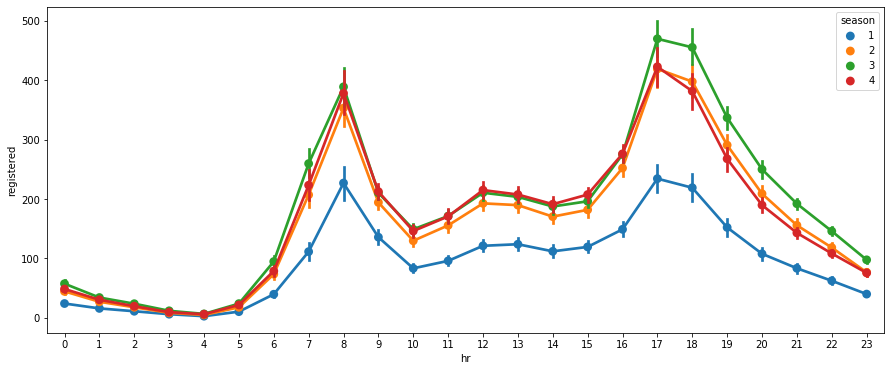

In [183]:
plt.figure(figsize=(15, 6))
sns.pointplot(x='hr', y='cnt', data=df, hue='season');

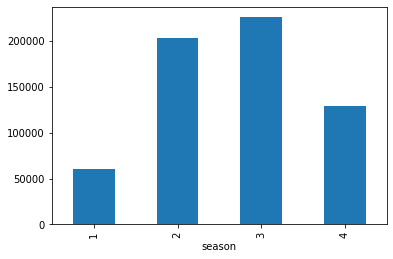

In [201]:
df.groupby('season')['casual'].sum().plot(kind='bar');

- **There is an increase in the use of bikes for seasons 2:spring, 3:summer, this may be due to the increase in the number of tourists visiting during the nicer seasons**

In [191]:
df.columns

Index(['dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [230]:
df['dteday'].apply(lambda X: X.day)

0         1
1         1
2         1
3         1
4         1
         ..
17374    31
17375    31
17376    31
17377    31
17378    31
Name: dteday, Length: 17379, dtype: int64

In [231]:
df['day'] = df['dteday'].apply(lambda X: X.day)

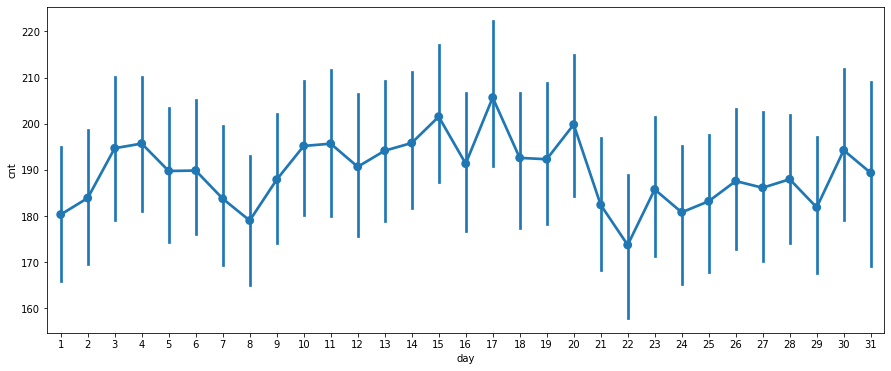

In [242]:
plt.figure(figsize=(15, 6))
sns.pointplot(x='day', y='cnt', data=df);

In [243]:
df.columns

Index(['dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'is_month_end', 'day'],
      dtype='object')

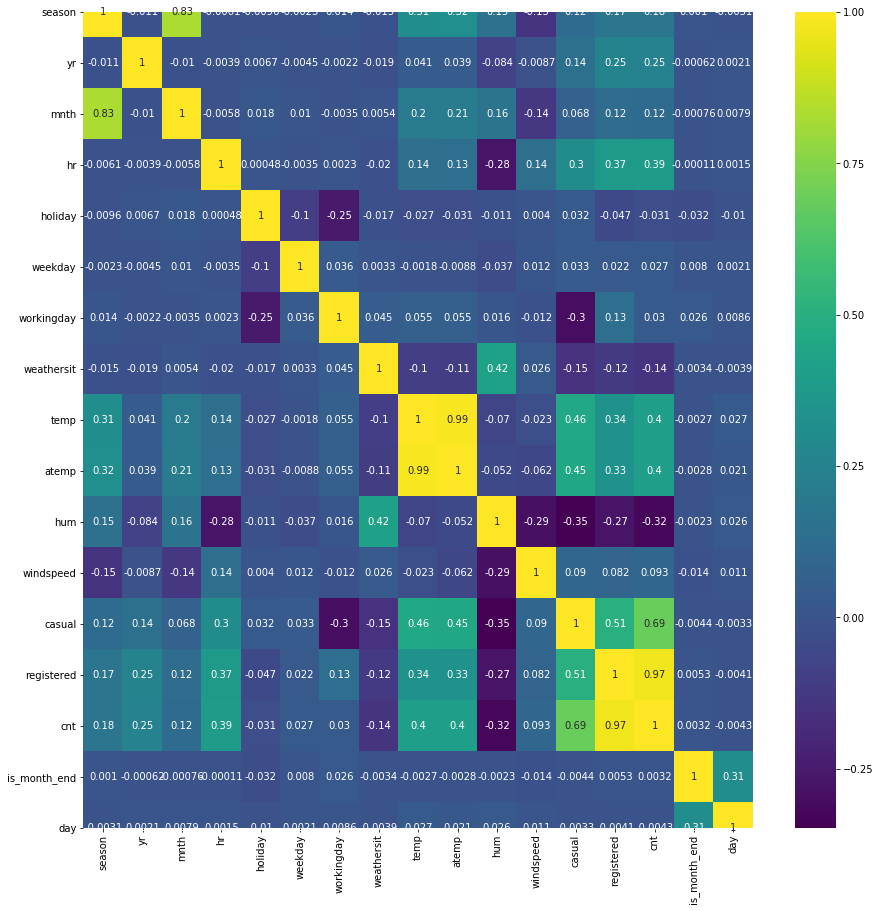

In [244]:
plt.figure(figsize=(15, 15))

sns.heatmap(df.corr(), annot=True, cmap='viridis')

In [255]:
X = df.drop(['cnt', 'casual', 'registered', 'yr', 'dteday'], axis=1)

y = df['cnt']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [256]:
from sklearn.ensemble import RandomForestRegressor

In [275]:
rf_reg = RandomForestRegressor(n_estimators=100, max_depth=30)

rf_reg.fit(X_train, y_train)

y_preds = rf_reg.predict(X_test)

In [276]:
from sklearn.metrics import mean_squared_log_error

np.sqrt(mean_squared_log_error(y_preds, y_test))

0.40833527555726346

In [268]:
rf_reg.feature_importances_

array([0.02268519, 0.02129967, 0.59893607, 0.00239909, 0.01641207,
       0.05392618, 0.02169279, 0.13317887, 0.02718652, 0.04970027,
       0.02318009, 0.02940319])

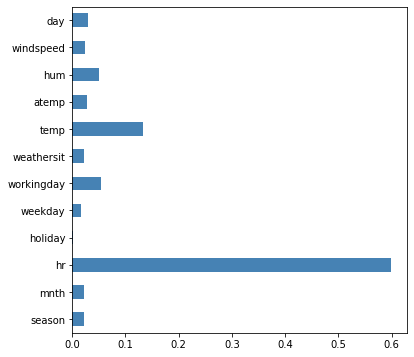

In [274]:
plt.figure(figsize=(6, 6))

pd.Series(rf_reg.feature_importances_, index=X.columns).plot.barh(color='steelblue');

**We can see that the hour of day is the most important feature**

In [277]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [278]:
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


In [ ]:
rf_random.best_params_